# Fine-tuning keras models



In [1]:
import pandas as pd
import numpy as np
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow.compat.v2 as tf

In [2]:
with open('data/predictors.npy', 'rb') as f:
    predictors = np.load(f)
    f.close()
    
with open('data/target.npy', 'rb') as f:
    target = np.load(f)
    f.close()
    
input_shape = (predictors.shape[1], )

In [3]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape)) 
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    return(model)

In [4]:
# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss='mean_squared_error')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

17/17 [==============================] - 0s 2ms/step - loss: 90.7465


Testing model with learning rate: 0.010000

17/17 [==============================] - 0s 2ms/step - loss: 90.7465


Testing model with learning rate: 1.000000

17/17 [==============================] - 0s 4ms/step - loss: 90.7465


## Model validation

In [5]:
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

12/12 [==============================] - 0s 29ms/step - loss: 88.0548 - val_loss: 124.5462


## Early stopping: Optimizing the optimization

In [6]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Specify the model
model_1 = Sequential()
model_1.add(Dense(100, activation='relu', input_shape = input_shape))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model
model_1_training = model_1.fit(predictors, target, validation_split=0.3, epochs=20, 
                               callbacks=[early_stopping_monitor])

Epoch 1/20
12/12 [==============================] - 0s 10ms/step - loss: 80.2349 - val_loss: 115.0992
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 80.2349 - val_loss: 115.0992
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 80.2349 - val_loss: 115.0992


## Experimenting with wider networks

In [7]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Specify the model
model_2 = Sequential()
model_2.add(Dense(100, activation=LeakyReLU(), input_shape = input_shape))
model_2.add(Dense(100, activation=LeakyReLU()))
model_2.add(Dense(1, activation='softmax'))

# Compile the model
model_2.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model
model_2_training = model_2.fit(predictors, target, validation_split=0.2, epochs=20, 
                               callbacks=[early_stopping_monitor])

Epoch 1/20
14/14 [==============================] - 0s 8ms/step - loss: 76.4148 - val_loss: 147.9391
Epoch 2/20
14/14 [==============================] - 0s 11ms/step - loss: 76.4148 - val_loss: 147.9391
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4148 - val_loss: 147.9391


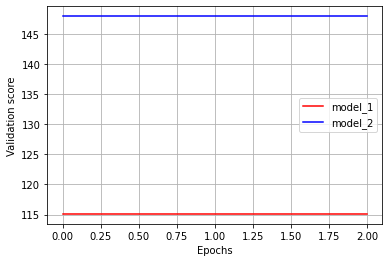

In [9]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', label = 'model_1')
plt.plot(model_2_training.history['val_loss'], 'b', label = 'model_2')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.grid()
plt.legend()
plt.show()

## Adding layers to a network

In [10]:
# Specify the model
model_2 = Sequential()
model_2.add(Dense(25, activation=LeakyReLU(), input_shape = input_shape))
model_2.add(Dense(25, activation=LeakyReLU()))
model_2.add(Dense(25, activation=LeakyReLU()))
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model
model_2.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model
model_2_training = model_2.fit(predictors, target, validation_split=0.2, epochs=20, 
                               callbacks=[early_stopping_monitor])

Epoch 1/20
14/14 [==============================] - 0s 14ms/step - loss: 77.1864 - val_loss: 147.9522
Epoch 2/20
14/14 [==============================] - 0s 5ms/step - loss: 76.4212 - val_loss: 147.9418
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 76.4173 - val_loss: 147.9408
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4167 - val_loss: 147.9405
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4165 - val_loss: 147.9404
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4164 - val_loss: 147.9404
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4163 - val_loss: 147.9403
Epoch 8/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4162 - val_loss: 147.9402
Epoch 9/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4162 - val_loss: 147.9402
Epoch 10/20
14/14 [==============================] - 0s 4ms/step - loss: 76.4161 - val_los

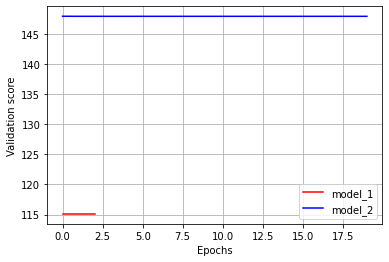

In [11]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', label = 'model_1')
plt.plot(model_2_training.history['val_loss'], 'b', label = 'model_2')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.grid()
plt.legend()
plt.show()

## Sequential Experiments

<img src="data/sequential.png" alt="alt text" width="500"/>

## Building your own digit recognition model

### Load MNIST
Load with the following arguments:

* `shuffle_files`: The MNIST data is only stored in a single file, but for larger datasets with multiple files on disk, it's good practice to shuffle them when training.
* `as_supervised`: Returns tuple `(img, label)` instead of dict `{'image': img, 'label': label}`

In [12]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Step 1: Create your input pipeline

### Build training pipeline
Apply the following transormations:

* `ds.map`: TFDS provide the images as tf.uint8, while the model expect tf.float32, so normalize images
* `ds.cache` As the dataset fit in memory, cache before shuffling for better performance. __Note__: Random transformations should be applied after caching
* `ds.shuffle`: For true randomness, set the shuffle buffer to the full dataset size. __Note__: For bigger datasets which do not fit in memory, a standard value is 1000 if your system allows it.
* `ds.batch`: Batch after shuffling to get unique batches at each epoch.
* `ds.prefetch`: Good practice to end the pipeline by prefetching for performances.

In [13]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

### Build evaluation pipeline
Testing pipeline is similar to the training pipeline, with small differences:

* No `ds.shuffle()` call
* Caching is done after batching (as batches can be the same between epoch)

In [14]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

## Step 2: Create and train the model

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 3s 6ms/step - loss: 0.3548 - accuracy: 0.9028 - val_loss: 0.1985 - val_accuracy: 0.9432
Epoch 2/6
469/469 [==============================] - 2s 3ms/step - loss: 0.1631 - accuracy: 0.9538 - val_loss: 0.1438 - val_accuracy: 0.9570
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1173 - accuracy: 0.9661 - val_loss: 0.1170 - val_accuracy: 0.9654
Epoch 4/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.9742 - val_loss: 0.0990 - val_accuracy: 0.9689
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9787 - val_loss: 0.0905 - val_accuracy: 0.9717
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0604 - accuracy: 0.9822 - val_loss: 0.0888 - val_accuracy: 0.9735


## Deep Learning With Jupyter Notebooks In The Cloud

Visit: https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws

## Sources

1. https://www.tensorflow.org/datasets/keras_example